In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Walmart DataSet.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.value_counts("Store")

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

In [9]:
df.value_counts("Holiday_Flag")

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [10]:
df.value_counts("Date")

Date
2010-02-05    45
2011-12-23    45
2011-11-11    45
2011-11-18    45
2011-11-25    45
              ..
2011-01-07    45
2011-01-14    45
2011-01-21    45
2011-01-28    45
2012-10-26    45
Name: count, Length: 143, dtype: int64

In [11]:
df.value_counts("Fuel_Price")

Fuel_Price
3.638    39
3.630    34
3.891    29
2.771    29
3.594    28
         ..
3.275     1
3.262     1
3.260     1
3.234     1
3.421     1
Name: count, Length: 892, dtype: int64

<Axes: >

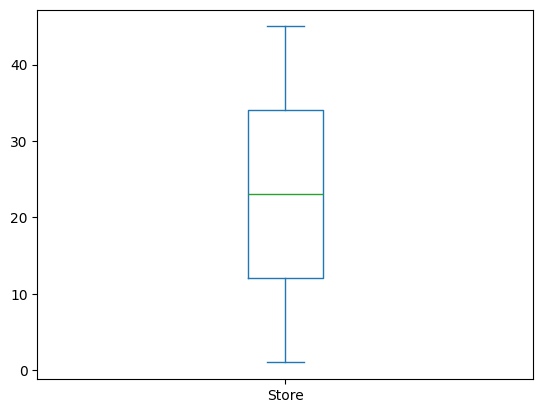

In [12]:
df["Store"].plot.box()

<Axes: >

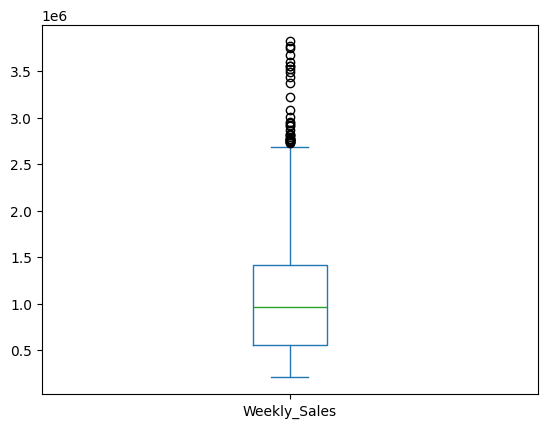

In [13]:
df["Weekly_Sales"].plot.box()

In [14]:
df["Weekly_Sales"].quantile(.98)

2203919.3019999997

In [15]:
new_df=df[df["Weekly_Sales"] < df["Weekly_Sales"].quantile(.98)]

<Axes: >

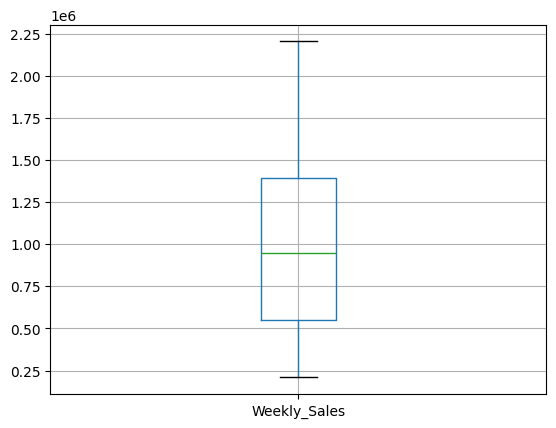

In [16]:
new_df.boxplot("Weekly_Sales")

<Axes: >

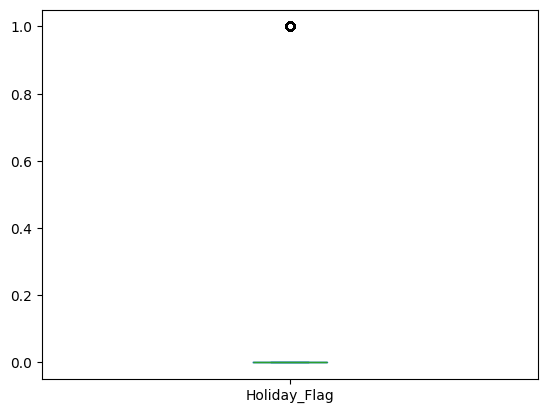

In [17]:
df["Holiday_Flag"].plot.box()

<Axes: >

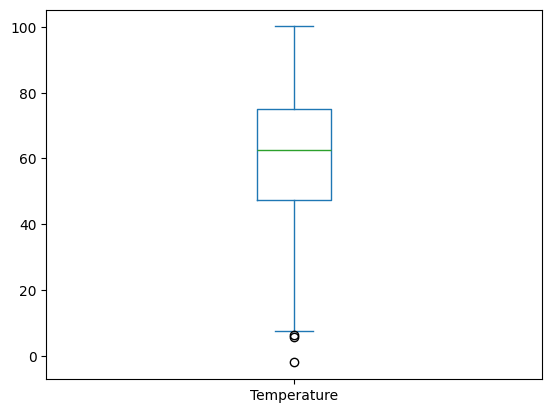

In [18]:
df["Temperature"].plot.box()

<Axes: >

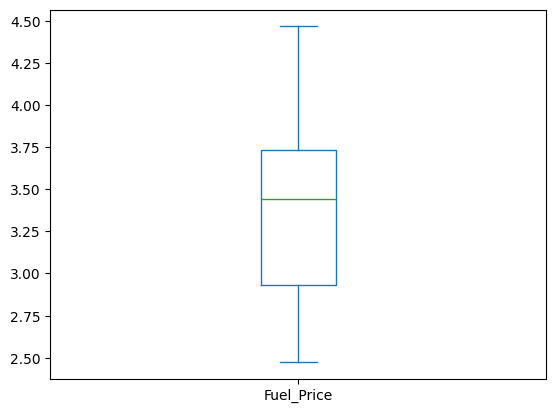

In [19]:
df["Fuel_Price"].plot.box()

<Axes: >

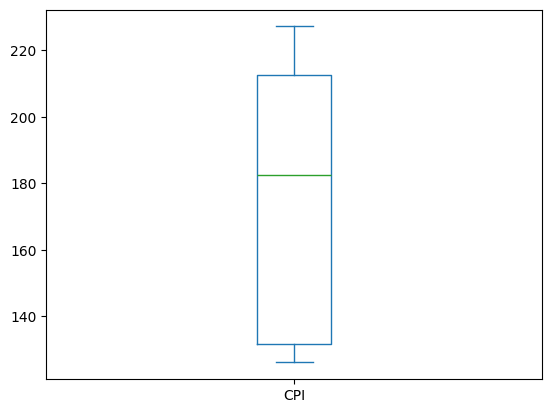

In [20]:
df["CPI"].plot.box()

<Axes: >

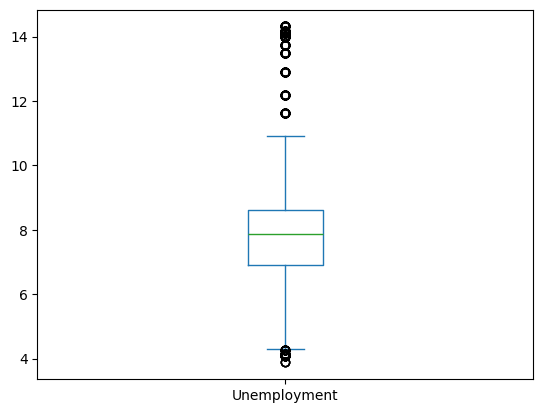

In [21]:
df["Unemployment"].plot.box()

In [22]:
df["Unemployment"].quantile(.94)

10.926

In [23]:
new_df=df[df["Unemployment"] < df["Unemployment"].quantile(.94)]

<Axes: >

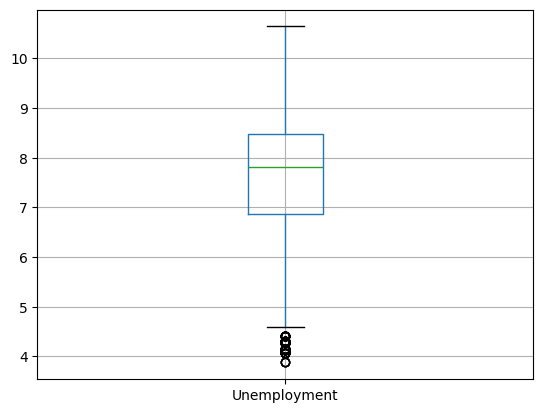

In [24]:
new_df.boxplot("Unemployment")

In [25]:
df["Unemployment"].quantile(.03)

4.781

In [26]:
new_df=df[df["Unemployment"] < df["Unemployment"].quantile(.03)]

<Axes: >

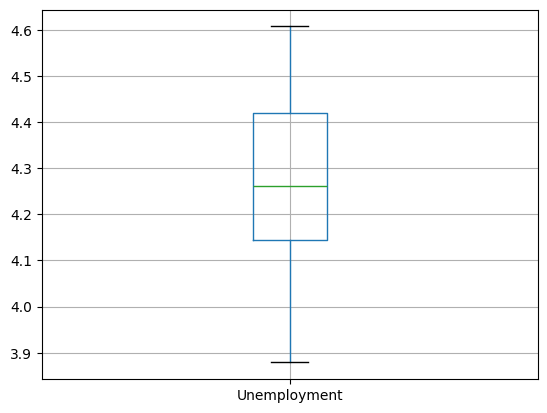

In [27]:
new_df.boxplot("Unemployment")

### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most

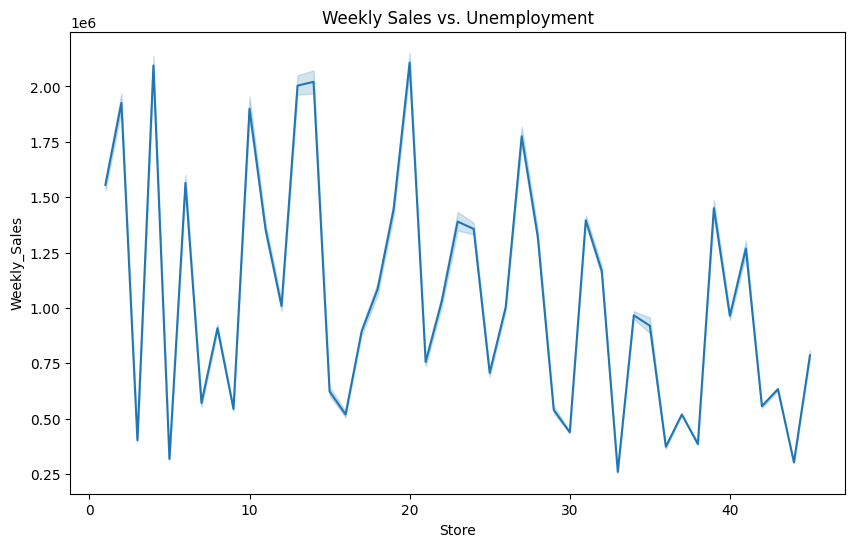

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Unemployment')
plt.show()

### b. If the weekly sales show a seasonal trend, when and what could be the reason?

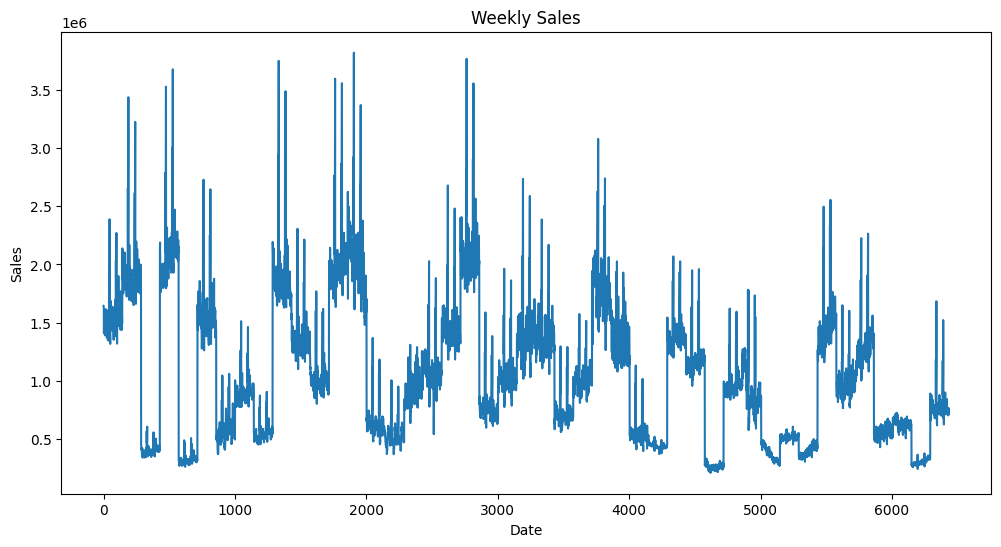

In [29]:
df['Weekly_Sales'].plot(figsize=(12, 6))
plt.title('Weekly Sales')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

### c. Does temperature affect the weekly sales in any manner?

In [30]:
correlation = df['Temperature'].corr(df['Weekly_Sales'])
print(f'Correlation between Temperature and Sales: {correlation}')

Correlation between Temperature and Sales: -0.06381001317946963


### d. How is the Consumer Price index affecting the weekly sales of various stores?

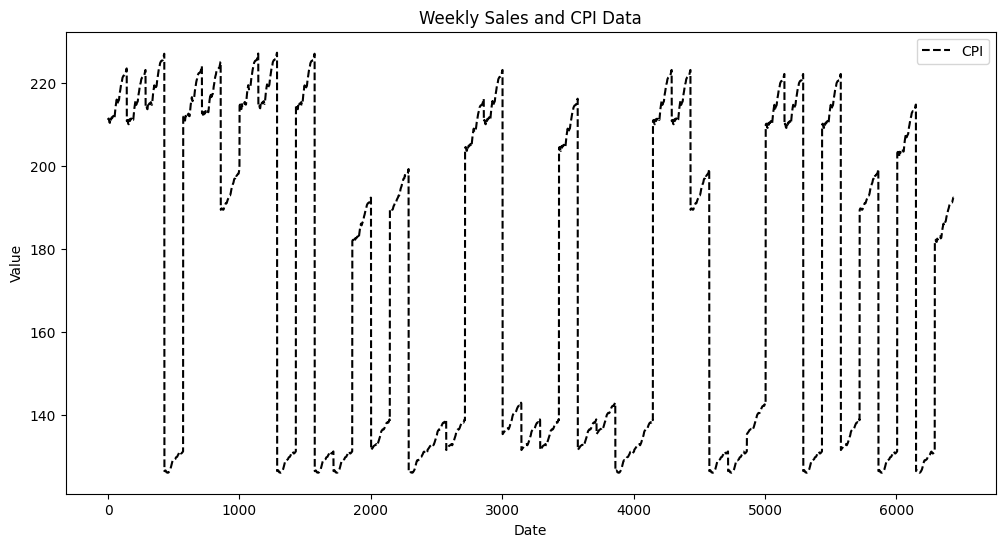

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['CPI'], label='CPI', color='black', linestyle='dashed')
plt.title('Weekly Sales and CPI Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### e. Top performing stores according to the historical data

In [32]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False).head(5)
print(top_stores)

    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08


### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores

In [33]:
worst_store = store_sales.sort_values(by='Weekly_Sales').head(1)
print(worst_store)

    Store  Weekly_Sales
32     33   37160221.96


### Predicting model
#### Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [34]:
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21600260137.320145


### Sales for each store for the next 12 weeks

In [46]:
unique_stores = df['Store'].unique()
random_stores = np.random.choice(unique_stores, 5, replace=False)
store_data = {store: df[df['Store'] == store] for store in random_stores}
def forecast_sales(store_df, weeks=12):
    store_df.set_index('Date', inplace=True)
    model = SARIMAX(store_df['Weekly_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    results = model.fit()
    forecast = results.get_forecast(steps=weeks)
    forecast_df = forecast.summary_frame()
    forecast_df.index.name = 'Date'
    forecast_df.columns = ['forecast', 'mean_se', 'mean_ci_lower', 'mean_ci_upper']
    store_df.reset_index(inplace=True)
    return forecast_df

for store_id in random_stores:
    forecast_df = forecast_sales(store_data[store_id])
    print(f"Forecast for Store {store_id}:\n{forecast_df}\n")

Forecast for Store 21:
                forecast        mean_se  mean_ci_lower  mean_ci_upper
Date                                                                 
2012-11-02  6.956076e+05   50965.174539   5.957177e+05   7.954975e+05
2012-11-09  6.909326e+05   62712.488373   5.680184e+05   8.138468e+05
2012-11-16  6.791819e+05   71132.966470   5.397638e+05   8.186000e+05
2012-11-23  1.095634e+06   78397.711221   9.419776e+05   1.249291e+06
2012-11-30  7.299389e+05   84995.303332   5.633512e+05   8.965266e+05
2012-12-07  8.214356e+05   91107.054413   6.428691e+05   1.000002e+06
2012-12-14  9.436237e+05   96832.007257   7.538364e+05   1.133411e+06
2012-12-21  1.262720e+06  102236.527085   1.062340e+06   1.463100e+06
2012-12-28  7.161539e+05  107369.280435   5.057140e+05   9.265938e+05
2013-01-04  5.916778e+05  112267.600233   3.716373e+05   8.117182e+05
2013-01-11  5.887814e+05  116960.939901   3.595422e+05   8.180207e+05
2013-01-18  6.078494e+05  121472.724698   3.697673e+05   8.459316e+